In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

In [60]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [61]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [63]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , inplace=True)

In [64]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [65]:
dataset['v1']=dataset['v1'].map({'ham':0,'spam':1})

In [66]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

<AxesSubplot: ylabel='count'>

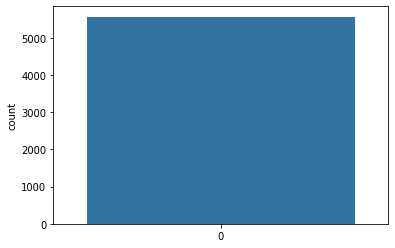

In [68]:
sns.countplot(dataset['v1'])

In [69]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [71]:
corpus=[]

In [72]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [73]:
for i in range(0 , len(dataset)):
  message = re.sub('[^a-zA-Z]' , ' ' , dataset['v2'][i])
  message = message.lower()
  message = message.split()
  ss = SnowballStemmer(language='english')
  message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
  message = ' '.join(message)
  corpus.append(message)
     

In [74]:
corpus[2]

'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli'

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,0].values


In [76]:
X.shape

(5572, 6216)

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
X_train.shape

(4457, 6216)

In [80]:
X_test.shape

(1115, 6216)

In [82]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train , y_train)

MultinomialNB()

In [83]:
y_pred=classifier.predict(X_test)

In [84]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot: >

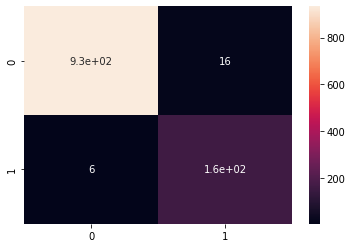

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [86]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_test,y_pred))

0.9090909090909091


In [87]:
print(recall_score(y_test , y_pred))

0.963855421686747


In [88]:
txt = 'What\'s up buddy how are you doing man' 

In [89]:
txt=np.array([txt])

In [91]:
txt=cv.transform(txt)

In [92]:
classifier.predict(txt)

array([0], dtype=int64)

In [93]:
import pickle

In [94]:
pickle.dump(classifier,open('model.pkl','wb'))

In [95]:
pickle.dump(cv , open('vector.pkl' , 'wb'))